In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [32]:
pd.options.display.float_format = '{:.2f}'.format

In [33]:
pwd

'C:\\Users\\김도연'

In [50]:
df_1=pd.read_csv('project2/Seoul.csv')

In [51]:
df_2=pd.read_csv('project2/Seoul_Test.csv')

In [36]:
df_1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
1,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
2,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
3,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
4,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11


In [37]:
df_2.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,202004,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3
1,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3
2,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3
3,202004,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8
4,202004,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5


In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 12 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   연월      int64 
 1   매장_시도   object
 2   매장_시군구  object
 3   업종명     object
 4   고객_시도   object
 5   고객_시군구  object
 6   연령대     object
 7   성별      int64 
 8   가구생애주기  int64 
 9   이용고객수   int64 
 10  이용금액    int64 
 11  이용건수    int64 
dtypes: int64(6), object(6)
memory usage: 573.1+ MB


In [28]:
df_1.shape

(6259502, 12)

In [30]:
df_1.describe()

,연월,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
count,6259502.00,6259502.00,6259502.00,6259502.00,6259502.00,6259502.00,6259502.00
mean,201923.46,37.40,1.47,2.71,71.05,2344776.16,158.81
std,36.59,14.73,0.50,1.39,337.21,13692186.91,1062.61
min,201901.00,10.00,1.00,1.00,3.00,20.00,1.00
25%,201904.00,30.00,1.00,1.00,4.00,101500.00,6.00
50%,201908.00,40.00,1.00,2.00,11.00,300000.00,17.00
75%,201911.00,50.00,2.00,4.00,34.00,1032000.00,58.00
max,202003.00,70.00,2.00,5.00,17152.00,879672180.00,88677.00


In [29]:
df_1['연령대'] = df_1['연령대'].str.rstrip('s').astype('int')
df_1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60,2,5,7,1181300,8
1,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50,2,4,3,756000,4
2,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50,2,4,6,2480710,14
3,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60,2,5,6,3604450,7
4,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50,2,4,4,1952750,11


In [10]:
df_1.isnull().sum()

연월        0
매장_시도     0
매장_시군구    0
업종명       0
고객_시도     0
고객_시군구    0
연령대       0
성별        0
가구생애주기    0
이용고객수     0
이용금액      0
이용건수      0
dtype: int64

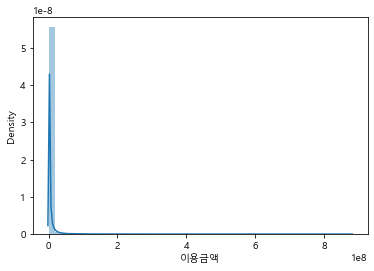

In [11]:
sns.distplot(df_1['이용금액']);

## 3분위 수 이상 데이터


In [13]:

df_1_high=df_1[df_1['이용금액']>=1032000.00]
df_1_high

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
2,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
3,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
4,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11
5,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,60s,1,5,3,1043900,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6259478,202003,서울,중랑구,화장품 및 방향제 소매업,서울,중랑구,50s,2,4,723,35674740,874
6259479,202003,서울,중랑구,화장품 및 방향제 소매업,서울,중랑구,60s,1,5,180,7224200,204
6259480,202003,서울,중랑구,화장품 및 방향제 소매업,서울,중랑구,60s,2,5,569,29074340,684
6259481,202003,서울,중랑구,화장품 및 방향제 소매업,서울,중랑구,70s,1,5,66,2386620,83


<AxesSubplot:xlabel='이용금액', ylabel='Density'>

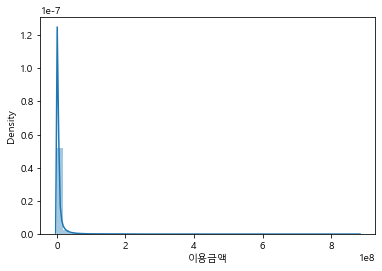

In [14]:
sns.distplot(df_1_high['이용금액'])

In [15]:
df_1_high.sort_values(by='이용금액',ascending=False).head(10)

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
2059293,201905,서울,은평구,기타 대형 종합 소매업,서울,은평구,50s,2,4,9486,879672180,27205
1834952,201905,서울,노원구,기타 대형 종합 소매업,서울,노원구,50s,2,4,9491,877016310,29267
6153216,202003,서울,송파구,슈퍼마켓,서울,송파구,50s,2,4,12148,867065376,47555
1739055,201905,서울,강서구,기타 대형 종합 소매업,서울,강서구,50s,2,4,9065,864238840,27966
974453,201903,서울,노원구,기타 대형 종합 소매업,서울,노원구,50s,2,4,9212,845829910,27209
4649107,201911,서울,은평구,기타 대형 종합 소매업,서울,은평구,50s,2,4,8646,837519400,23473
1834947,201905,서울,노원구,기타 대형 종합 소매업,서울,노원구,40s,2,3,9346,834830910,30431
5015988,201912,서울,송파구,한식 음식점업,서울,송파구,50s,1,4,13104,828693834,25156
5079765,201912,서울,은평구,기타 대형 종합 소매업,서울,은평구,50s,2,4,8717,821757900,23116
357087,201901,서울,은평구,기타 대형 종합 소매업,서울,은평구,50s,2,4,8841,818663090,23039


이용금액 3분위 이상의 데이터 기준

In [16]:
# 매장 시도, 시군구 기준 업종별 이용금액 top 10(19년 1월~20년 4월)
df_1_high.groupby(['매장_시군구','업종명'])['이용금액'].sum().reset_index().sort_values(by='이용금액',ascending=False).head(10)

,매장_시군구,업종명,이용금액
736,중구,택시 운송업,1035798967370
365,동작구,택시 운송업,498565413189
121,강서구,정기 항공 운송업,395104440153
32,강남구,한식 음식점업,351735735386
621,용산구,기타음식료품위주종합소매업,284527953499
711,중구,그외 기타 종합 소매업,253092756788
462,서초구,한식 음식점업,201196546007
398,마포구,한식 음식점업,184811139555
546,송파구,한식 음식점업,169631072078
34,강남구,화장품 및 방향제 소매업,169099893746


In [47]:
df_1.groupby(['연월','매장_시군구','업종명'])['이용금액','이용건수'].sum().reset_index().sort_values(by='이용금액',ascending=False).head(10)


,연월,매장_시군구,업종명,이용금액,이용건수
5505,201907,중구,택시 운송업,81457556200,10022233
9463,201912,중구,택시 운송업,80221191600,9808398
7085,201909,중구,택시 운송업,75979119040,9267591
3129,201904,중구,택시 운송업,74877206190,9388932
3923,201905,중구,택시 운송업,74754172650,9179561
7875,201910,중구,택시 운송업,74612441710,9120569
6297,201908,중구,택시 운송업,73309274190,9082785
8672,201911,중구,택시 운송업,70653144110,8629327
10255,202001,중구,택시 운송업,70342740820,8733015
4718,201906,중구,택시 운송업,67649862270,8290376


In [48]:
# 매장 시도, 시군구 기준 업종별 이용금액 top 10(19년 1월~20년 3월)
df_1.groupby(['매장_시군구','업종명'])['이용금액','이용건수'].sum().reset_index().sort_values(by='이용금액',ascending=False).head(10)

,매장_시군구,업종명,이용금액,이용건수
794,중구,택시 운송업,1048710010930,130997012
393,동작구,택시 운송업,513232792152,74832594
126,강서구,정기 항공 운송업,399960821292,1498096
32,강남구,한식 음식점업,359753306159,13005238
673,용산구,기타음식료품위주종합소매업,295967101297,32537356
767,중구,그외 기타 종합 소매업,261223008286,3784987
498,서초구,한식 음식점업,209714818145,7220071
429,마포구,한식 음식점업,191068743031,7318026
775,중구,비알콜 음료점업,178275682520,23016703
102,강서구,그외 기타 종합 소매업,176295513328,2687596


## 3분위 이하 데이터 

In [17]:
df_1_low=df_1[df_1['이용금액']<1032000.00]
df_1_low

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
1,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
6,201901,서울,강남구,건강보조식품 소매업,경기,고양시 덕양구,30s,2,2,3,683300,5
15,201901,서울,강남구,건강보조식품 소매업,경기,김포시,30s,2,2,4,997550,8
18,201901,서울,강남구,건강보조식품 소매업,경기,김포시,60s,2,5,3,535950,3
21,201901,서울,강남구,건강보조식품 소매업,경기,남양주시,50s,1,4,3,372900,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6259497,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,40s,2,3,3,25800,3
6259498,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,50s,1,4,9,231700,10
6259499,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,50s,2,4,16,288700,17
6259500,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,60s,1,5,6,69600,6


<AxesSubplot:xlabel='이용금액', ylabel='Density'>

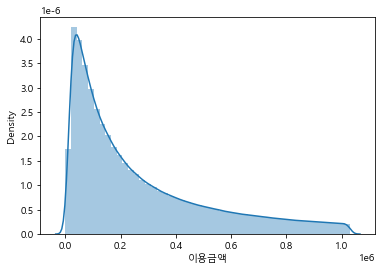

In [18]:
sns.distplot(df_1_low['이용금액'])

In [19]:
# 매장 시도, 시군구 기준 업종별 이용금액 top 10(19년 1월~20년 3월)
df_1_low.groupby(['매장_시군구','업종명'])['이용금액'].sum().reset_index().sort_values(by='이용금액',ascending=False).head(10)

,매장_시군구,업종명,이용금액
476,서초구,버스 운송업,16508759840
773,중구,비알콜 음료점업,15113544430
392,동작구,택시 운송업,14667378963
101,강서구,그외 기타 종합 소매업,13209561532
792,중구,택시 운송업,12911043560
778,중구,스포츠 및 레크레이션 용품 임대업,11542923990
671,용산구,기타음식료품위주종합소매업,11439147798
29,강남구,체인화 편의점,9048048232
494,서초구,체인화 편의점,8882534168
496,서초구,한식 음식점업,8518272138


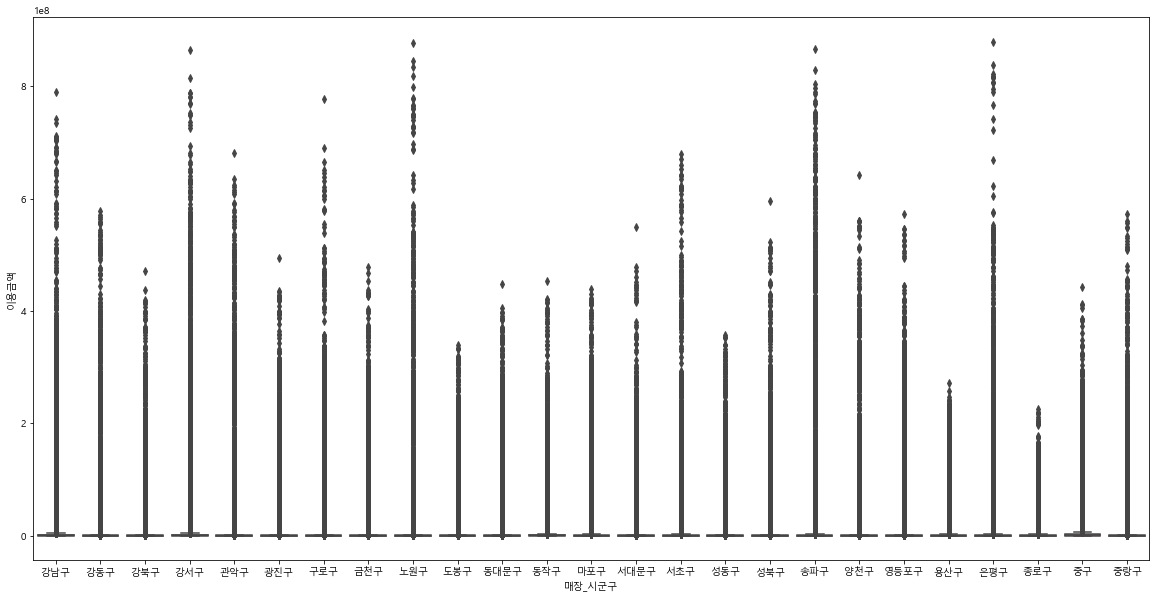

In [23]:
var='매장_시군구'
data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)


서울시 전체 데이터를 가지고 박스 플롯을 그려봤을 때 분포를 알기 어렵다. 그래서 이용금액 기준 3분위 이하의 데이터를 가지고 다시 그려봤다.

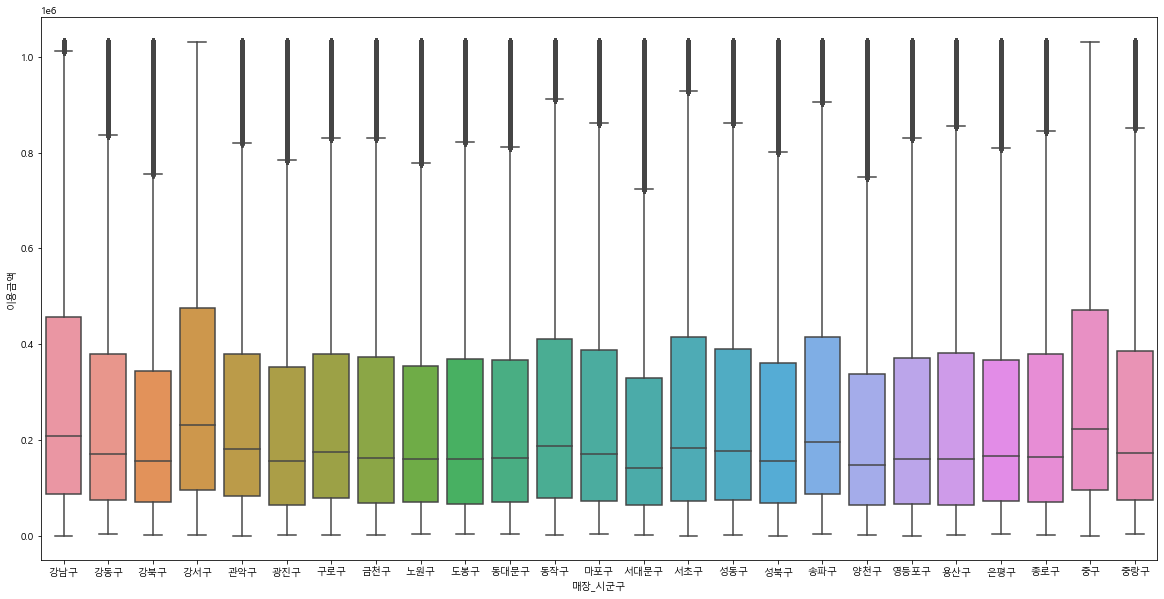

In [24]:
var='매장_시군구'
data=pd.concat([df_1_low['이용금액'],df_1_low[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)

중구, 강남구, 강서구 순으로 높은 총 이용금액을 보였다. 

In [36]:
var='매장_시군구'
data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby('매장_시군구').sum().sort_values(by='이용금액',ascending=False)
data=data.reset_index()

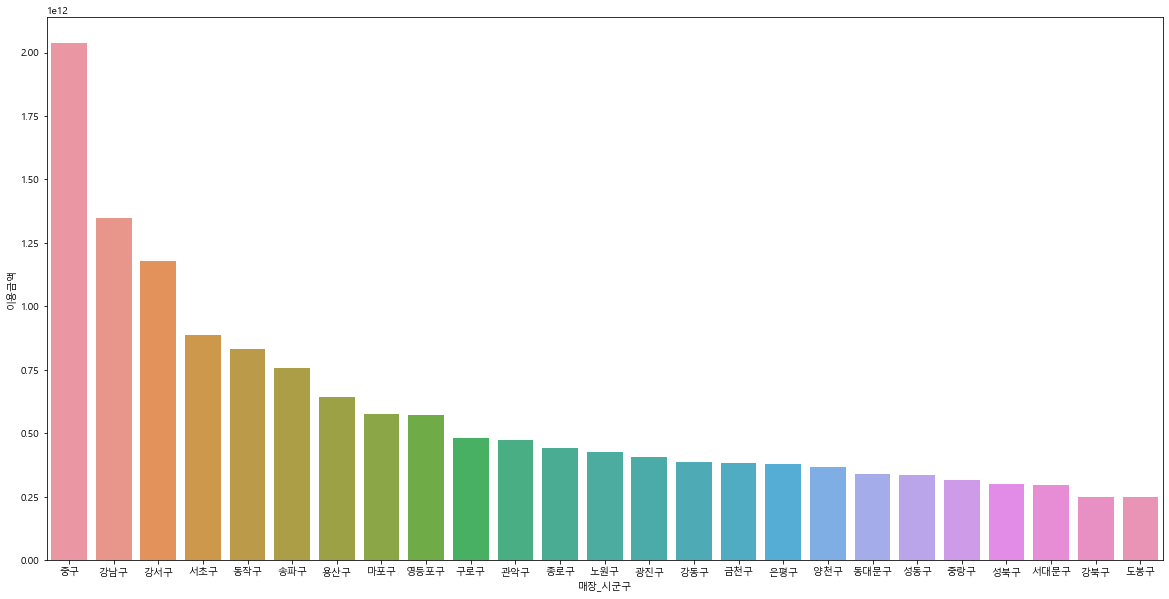

In [37]:
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)

In [52]:
var='매장_시군구'
data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby('매장_시군구').mean().sort_values(by='이용금액',ascending=False)
data=data.reset_index()

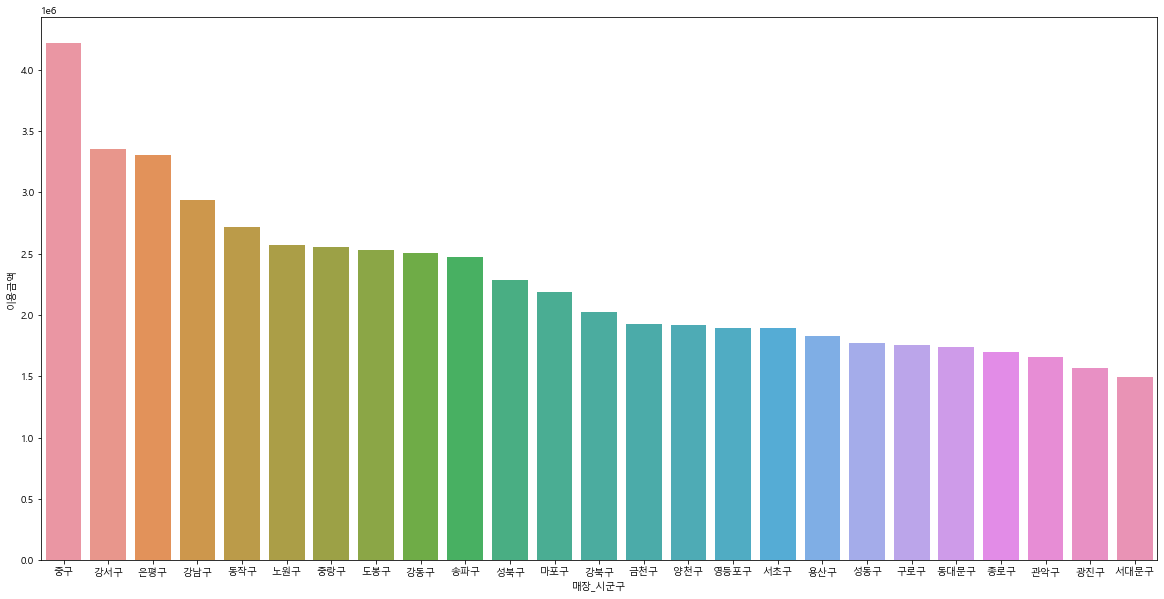

In [53]:
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)

In [44]:
var='고객_시도'
data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby('고객_시도').sum().sort_values(by='이용금액',ascending=False)
data=data.reset_index()

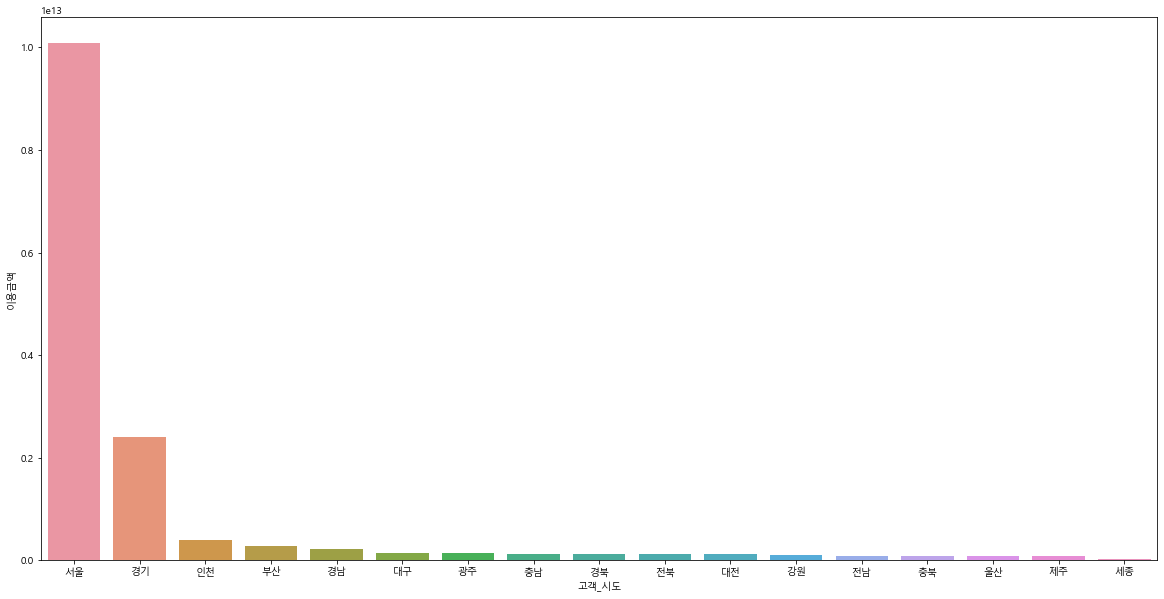

In [45]:
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)

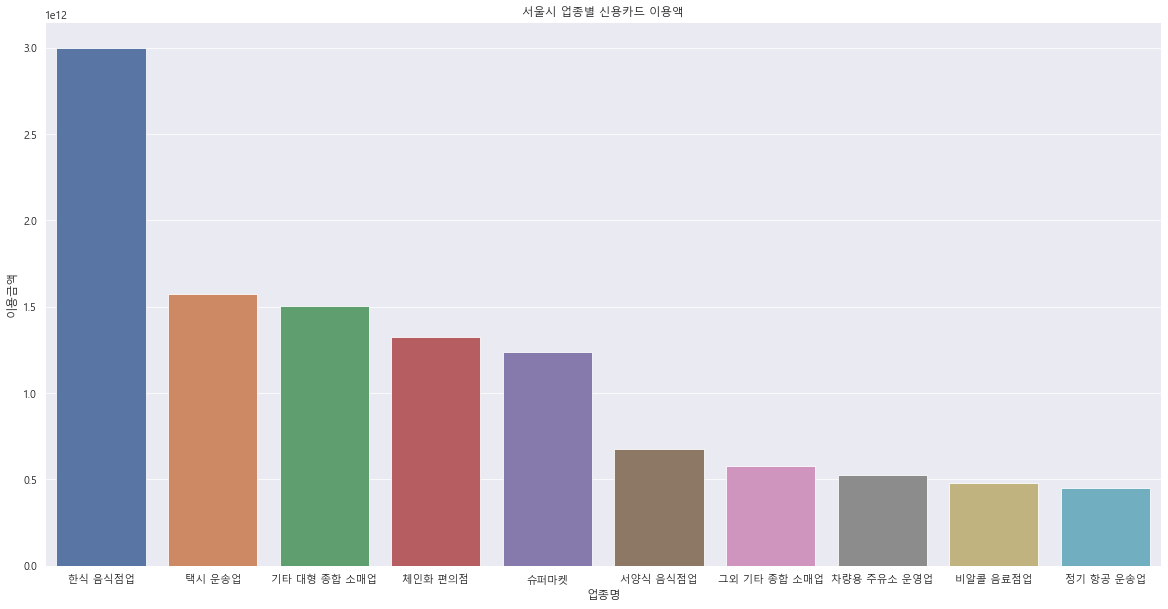

In [88]:
var='업종명'

data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby(var).sum().sort_values(by='이용금액',ascending=False)
data=data.reset_index().head(10)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)
plt.title('서울시 업종별 신용카드 이용액')
sns.set_context("paper", font_scale=1.2)

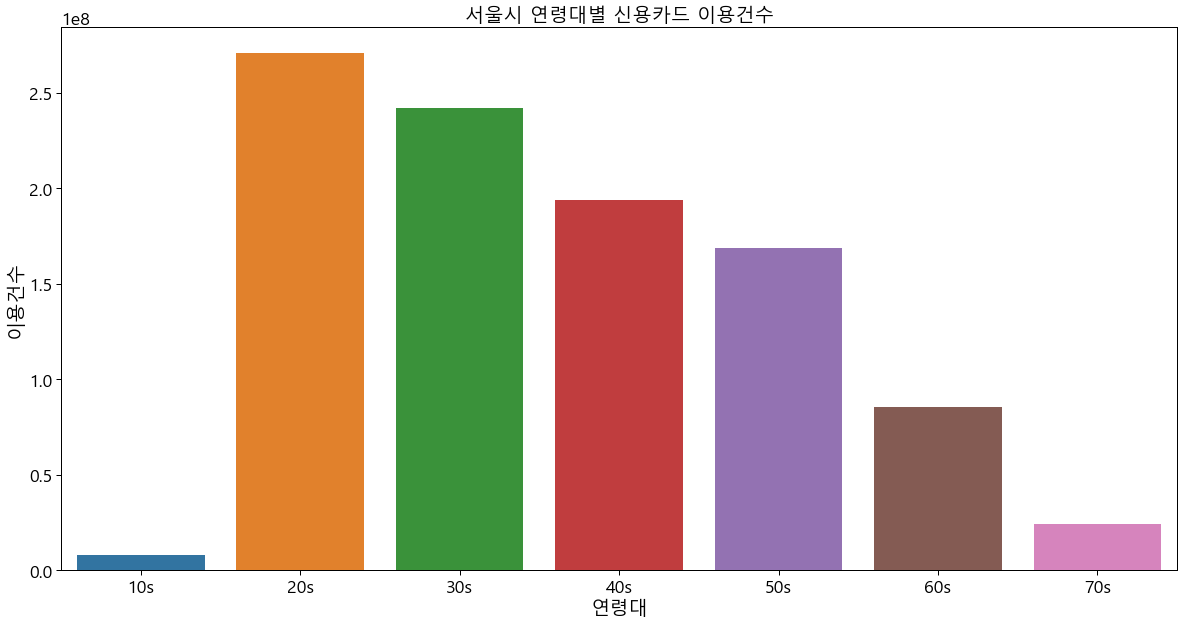

In [56]:
var='연령대'

data=pd.concat([df_1['이용건수'],df_1[var]],axis=1)
data=data.groupby(var).sum()
data=data.reset_index().head(10)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용건수',data=data,ci=None)
plt.title('서울시 연령대별 신용카드 이용건수')
sns.set_context("paper", font_scale=2)

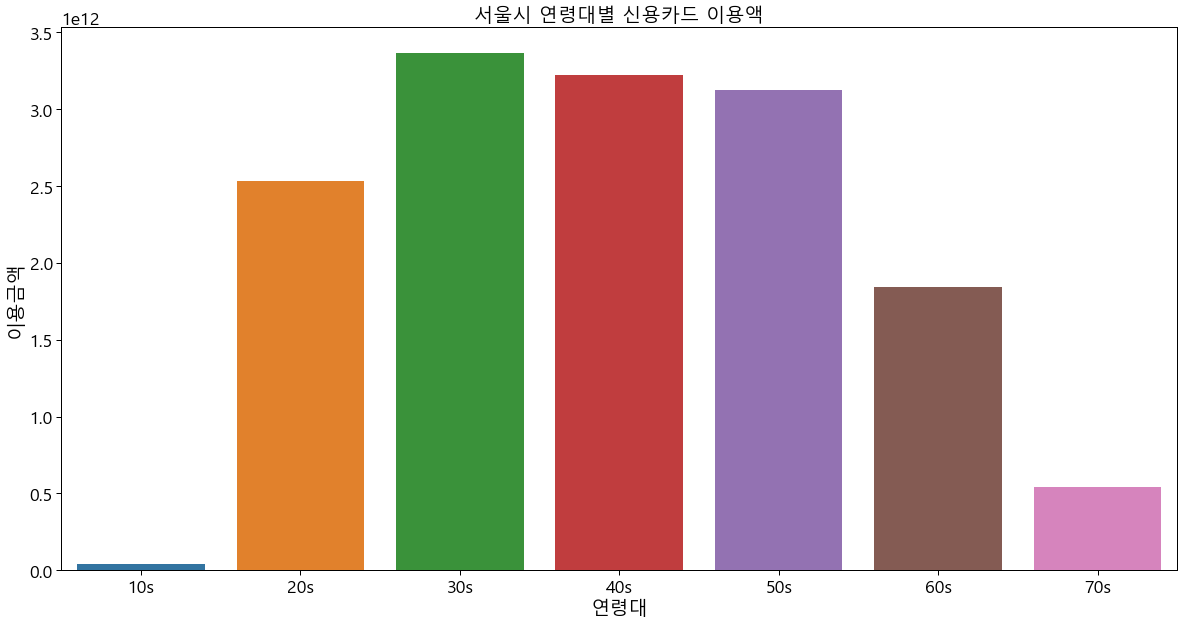

In [57]:
var='연령대'

data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby(var).sum()
data=data.reset_index().head(10)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)
plt.title('서울시 연령대별 신용카드 이용액')
sns.set_context("paper", font_scale=2)

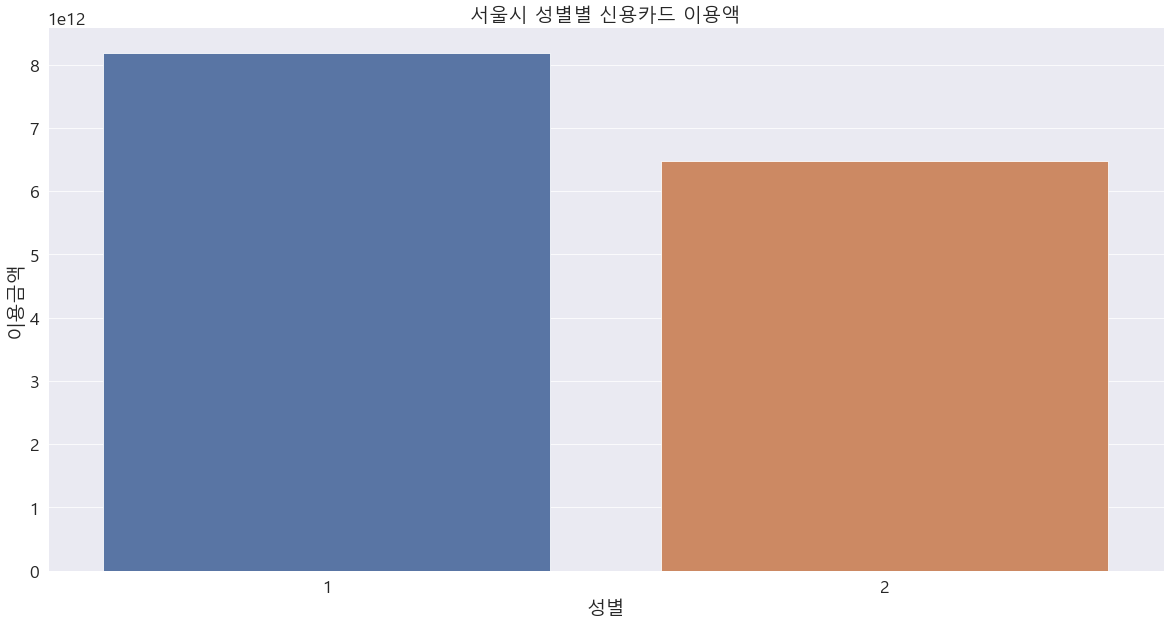

In [106]:
var='성별'

data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby(var).sum()
data=data.reset_index().head(10)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)
plt.title('서울시 성별별 신용카드 이용액')
sns.set_context("paper", font_scale=2)

In [124]:
var='성별'

data=pd.concat([df_1['이용금액'],df_1[var],df_1['연령대']],axis=1)
data=data.groupby(['성별','연령대']).sum()

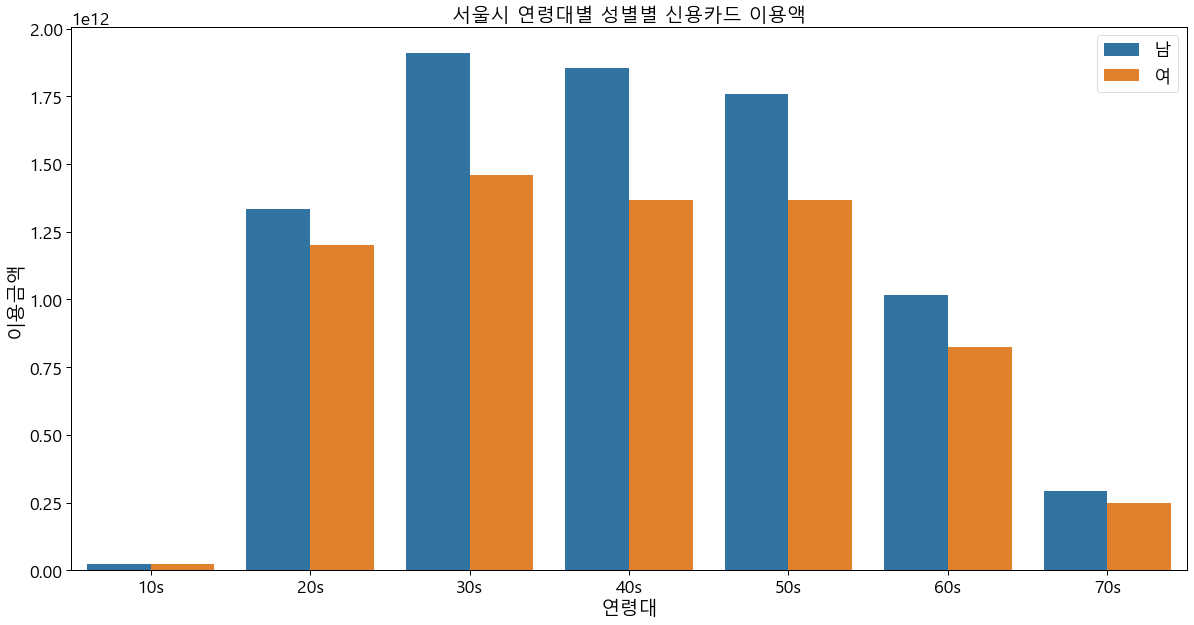

In [58]:
var='성별'

data=pd.concat([df_1['이용금액'],df_1[var],df_1['연령대']],axis=1)
data=data.groupby(['성별','연령대']).sum()
data=data.reset_index()
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x='연령대', y='이용금액',data=data,ci=None, hue=var)
plt.title('서울시 연령대별 성별별 신용카드 이용액')
plt.legend(['남','여'])
sns.set_context("paper", font_scale=2)

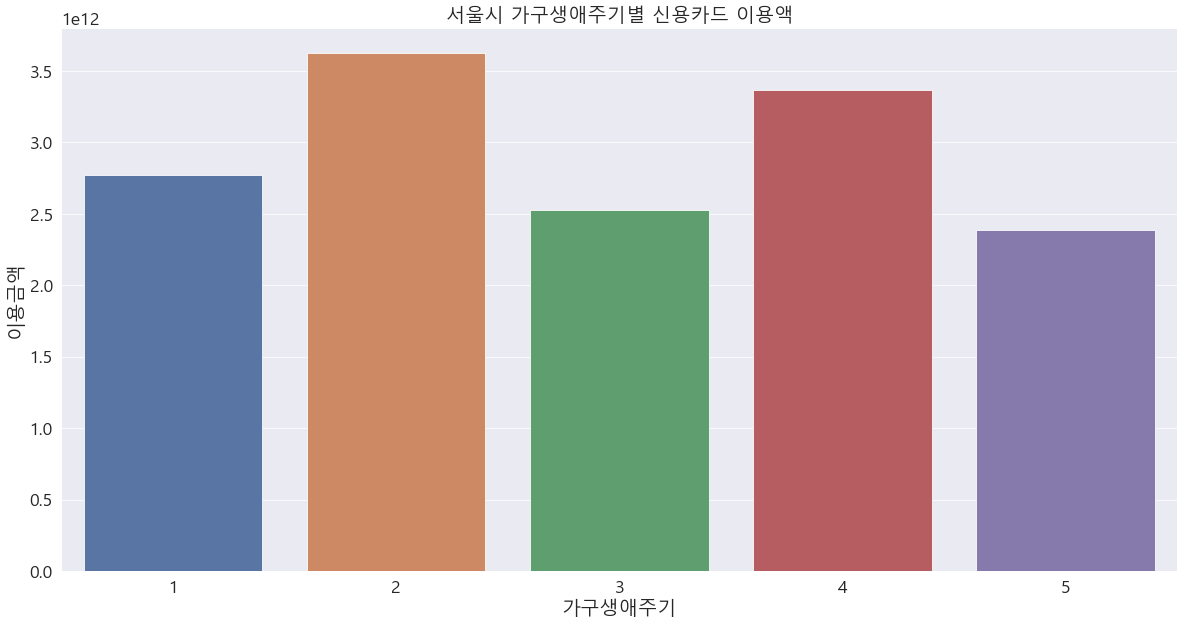

In [155]:
var='가구생애주기'


data=pd.concat([df_1['이용금액'],df_1[var]],axis=1)
data=data.groupby(var).sum()
data=data.reset_index()
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x=var, y='이용금액',data=data,ci=None)
plt.title('서울시 가구생애주기별 신용카드 이용액')
sns.set_context("paper", font_scale=2)

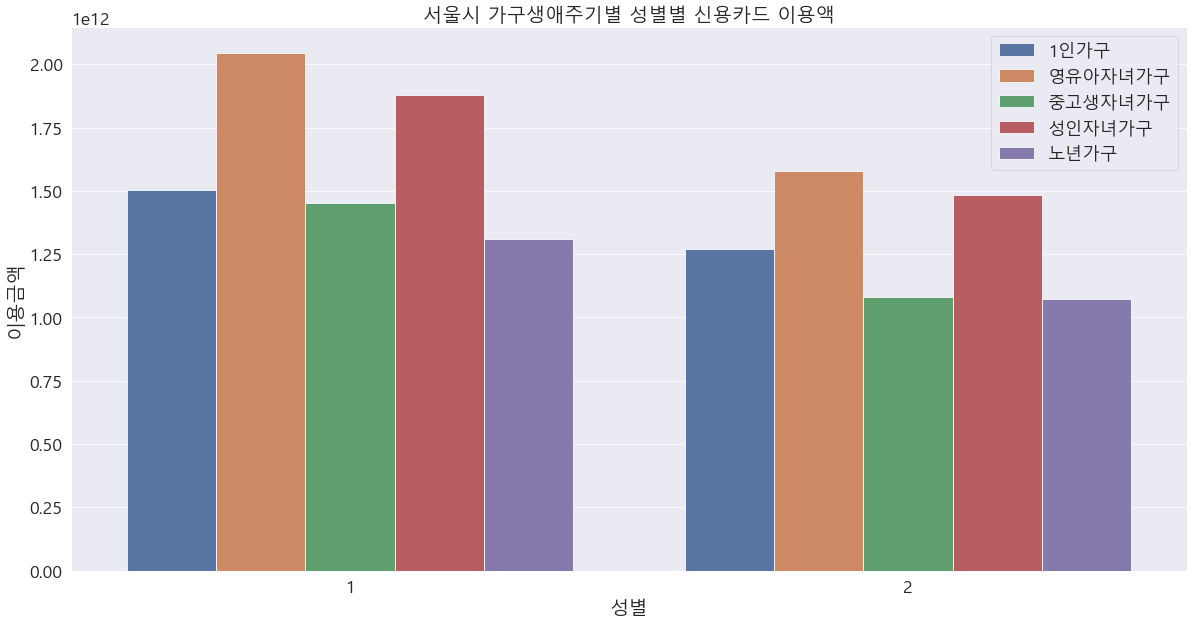

In [156]:
var='가구생애주기'


data=pd.concat([df_1['이용금액'],df_1[var],df_1['성별']],axis=1)
data=data.groupby([var,'성별']).sum()
data=data.reset_index()
f, ax= plt.subplots(figsize=(20,10))
fig= sns.barplot(x='성별', y='이용금액',data=data,ci=None, hue=var)
plt.title('서울시 가구생애주기별 성별별 신용카드 이용액')
sns.set_context("paper", font_scale=2)
plt.legend(['1인가구','영유아자녀가구','중고생자녀가구','성인자녀가구','노년가구'])

In [102]:
df_1_kind1 = df_1.groupby( ( '업종명' ), as_index = False ).이용고객수.sum()
# df_1_kind1
df_1_kind2 = df_1.groupby( ( '업종명' ), as_index = False ).이용금액.mean()
# df_1_kind2
df_1_kind3 = df_1.groupby( ( '업종명' ), as_index = False ).이용건수.sum()
# df_1_kind3

In [103]:
d = df_1_kind1.sort_index().merge(df_1_kind2.sort_index()).merge(df_1_kind3.sort_index())

In [104]:

d.이용고객수 = (d.이용고객수 / 100).round(0).astype(int)
d.이용건수 = (d.이용건수 / 100).round(0).astype(int)

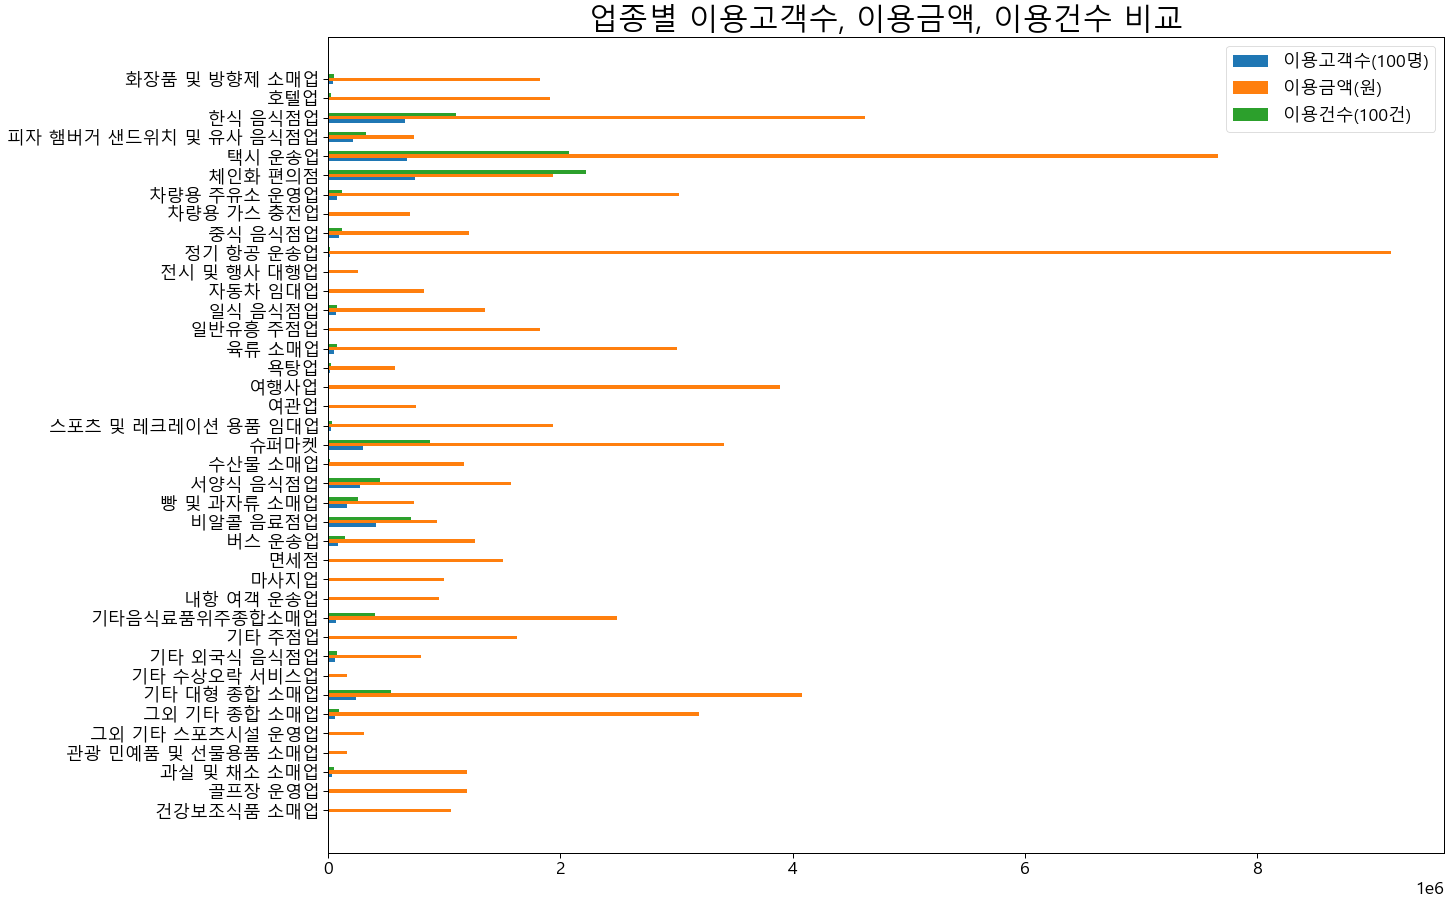

In [105]:
fig = plt.figure( figsize = ( 20, 15) ) 
ax1 = fig.add_subplot( 1, 1, 1 )
labels = list(d.업종명)
x=np.arange(len(labels))
width = 0.35

ax1.barh(x-width/2, d.이용고객수, width/2, label = '이용고객수(100명)')
ax1.barh(x, d.이용금액, width/2, label = '이용금액(원)')
ax1.barh(x+width/2, d.이용건수, width/2, label = '이용건수(100건)')


ax1.set_yticks(x)
ax1.set_yticklabels(labels, rotation = 0)
ax1.legend()
ax1.set_title('업종별 이용고객수, 이용금액, 이용건수 비교',size=30)

plt.show()

,연월,이용고객수
0,201901,291372
1,201902,271225
2,201903,304388
3,201904,305099
4,201905,326735
5,201906,317570
6,201907,318298
7,201908,316974
8,201909,306383
9,201910,315309


In [109]:
df_1["연월"] = pd.to_datetime(df_1["연월"],format='%Y%m')
df_1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
1,2019-01-01,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
2,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
3,2019-01-01,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
4,2019-01-01,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11


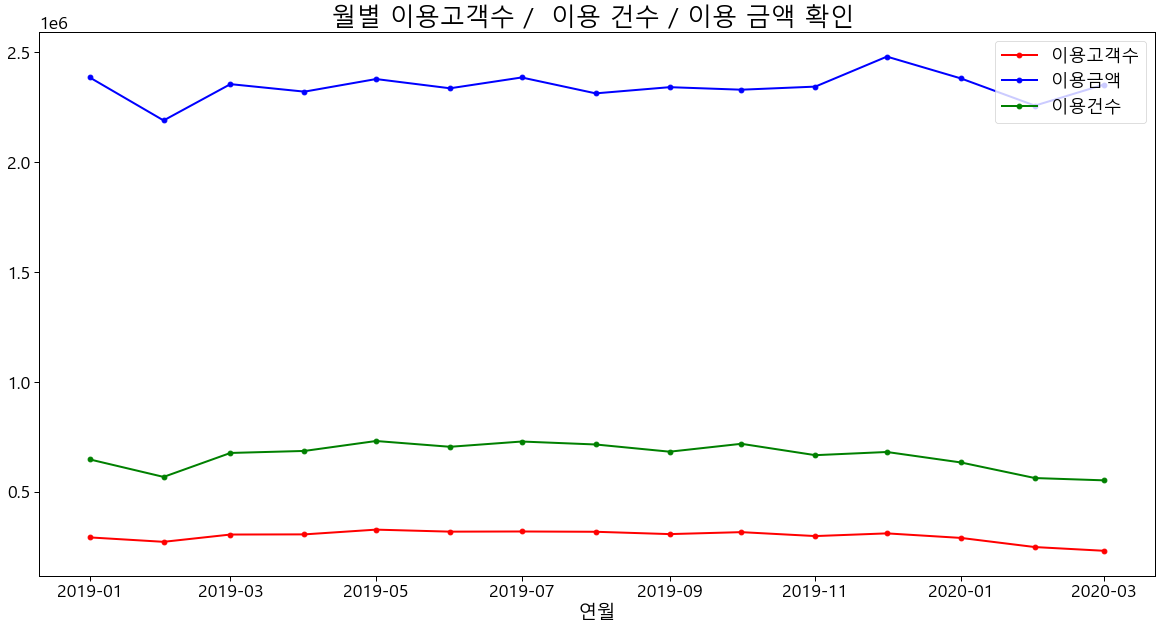

In [110]:
df_1_year1 = df_1.groupby( ( '연월' ), as_index = False ).이용고객수.sum()
df_1_year1['이용고객수'] = (df_1_year1['이용고객수'] / 100).round(0).astype(int)

df_1_year2 = df_1.groupby( ( '연월' ), as_index = False ).이용금액.mean()
df_1_year2['이용금액'] = df_1_year2['이용금액'].round(0).astype(int)

df_1_year3 = df_1.groupby( ( '연월' ), as_index = False ).이용건수.sum()
df_1_year3['이용건수'] = (df_1_year3['이용건수'] / 100).round(0).astype(int)


fig = plt.figure( figsize = ( 20, 10) ) 
ax1 = fig.add_subplot( 1, 1, 1 )
ax2 = fig.add_subplot( 1, 1, 1 )
ax3 = fig.add_subplot(1,1,1)


ax1.plot(df_1_year1['연월'], df_1_year1['이용고객수'], color = 'r', linewidth=2,  marker='o', label = '이용고객수(100명)' )
ax2.plot(df_1_year2['연월'], df_1_year2['이용금액'], color = 'b', linewidth=2,  marker='o' , label = '이용금액(원)')
ax3.plot(df_1_year3['연월'], df_1_year3['이용건수'], color = 'g', linewidth=2,  marker='o', label = '이용건수(100건)' )

plt.title('월별 이용고객수 /  이용 건수 / 이용 금액 확인 ', size = 25)
plt.xlabel('연월')
plt.legend(loc = 'upper right', labels=('이용고객수','이용금액','이용건수')) 
plt.show()

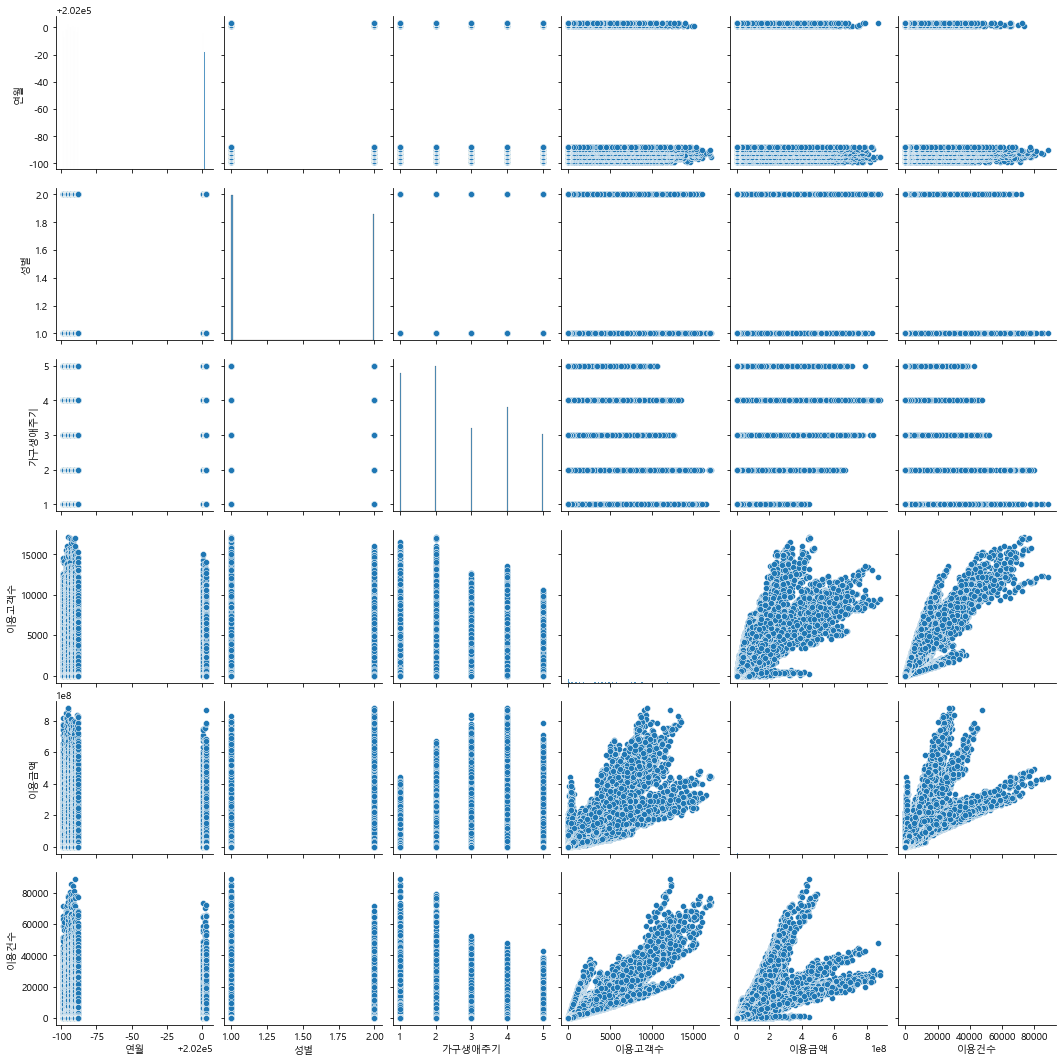

In [26]:
sns.pairplot(df_1)

## 다중선형회귀모형

In [39]:
df_1

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
820918,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
820919,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
820920,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
820921,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
820922,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11
...,...,...,...,...,...,...,...,...,...,...,...,...
24404727,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,40s,2,3,3,25800,3
24404728,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,50s,1,4,9,231700,10
24404729,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,50s,2,4,16,288700,17
24404730,202003,서울,중랑구,화장품 및 방향제 소매업,인천,서구,60s,1,5,6,69600,6


In [159]:
df_2

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,202004,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3
1,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3
2,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3
3,202004,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8
4,202004,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
348295,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,40s,2,3,7,46000,9
348296,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,50s,2,4,4,64000,5
348297,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,1,5,3,72900,5
348298,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,2,5,9,64800,9


In [5]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [6]:
df_1['년'] = df_1['연월'].apply(lambda x: grap_year(x))
df_1['월'] = df_1['연월'].apply(lambda x: grap_month(x))
df_1 = df_1.drop(['연월'], axis=1)

In [7]:
df_2['년'] = df_2['연월'].apply(lambda x: grap_year(x))
df_2['월'] = df_2['연월'].apply(lambda x: grap_month(x))
df_2 = df_2.drop(['연월'], axis=1)

In [8]:
del df_1['고객_시군구']

In [9]:
del df_2['고객_시군구']

In [10]:
dtypes = df_1.dtypes
encoders = {}
for column in df_1.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_1[column])
        encoders[column] = encoder
        
df_1_num = df_1.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_1_num[column] = encoder.transform(df_1[column])

In [11]:
dtypes = df_2.dtypes
encoders = {}
for column in df_2.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_2[column])
        encoders[column] = encoder
        
df_2_num = df_2.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_2_num[column] = encoder.transform(df_2[column])

In [11]:
y_train=df_1_num.loc[:,'이용금액']
X_train=df_1_num.loc[:,df_1_num.columns !='이용금액']

y_test=df_2_num.loc[:,'이용금액']
X_test=df_2_num.loc[:,df_2_num.columns !='이용금액']

In [79]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.569e+06
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:06:47   Log-Likelihood:            -1.0760e+08
No. Observations:             6259502   AIC:                         2.152e+08
Df Residuals:                 6259490   BIC:                         2.152e+08
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.524e+08   1.71e+07     -8.909      0.000   -1.86e+08   -1.19e+08
매장_시도       1.658e-05   1.86e-06      8.909      0.000    1.29e-05    2.02e-05
매장_시군구     -3.009e+04    380.193    -79.147      0.000   -3.08e+04   -2.93e+04
업종명        -2.314e+04    261.219    -88.589      0.000   -2.37e+04   -2.26e+04
고객_시도       6033.3773    661.736      9.117      0.000    4736.398    7330.356
고객_시군구      -488.7654     45.855    -10.659      0.000    -578.640    -398.891
연령대          1.47e+05   5293.832     27.763      0.000    1.37e+05    1.57e+05
성별         -3.081e+05   5672.061    -54.323      0.000   -3.19e+05   -2.97e+05
가구생애주기      2.237e+05   5595.945     39.980      0.000    2.13e+05    2.35e+05
이용고객수       3.176e+04     21.406   1483.550      0.000    3.17e+04    3.18e+04
이용건수        1042.8908      6.785    153.712      0.000    1029.593    1056.189
년           7.563e+04   8472.436      8.926      0.000     5.9e+04    9.22e+04
월            520.9018    900.822      0.578      0.563   -1244.678    2286.481
==============================================================================
Omnibus:                 12079813.353   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     138464117960.499
Skew:                          14.490   Prob(JB):                         0.00
Kurtosis:                     731.049   Cond. No.                     1.70e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.9e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
df_1_num=df_1_num.drop('월',axis=1)
df_2_num=df_2_num.drop('월',axis=1)

In [85]:
y_train=df_1_num.loc[:,'이용금액']
X_train=df_1_num.loc[:,df_1_num.columns !='이용금액']

y_test=df_2_num.loc[:,'이용금액']
X_test=df_2_num.loc[:,df_2_num.columns !='이용금액']

In [86]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.726e+06
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:09:49   Log-Likelihood:            -1.0760e+08
No. Observations:             6259502   AIC:                         2.152e+08
Df Residuals:                 6259491   BIC:                         2.152e+08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.476e+08   1.49e+07     -9.891      0.000   -1.77e+08   -1.18e+08
매장_시도      -3.931e-05   3.97e-06     -9.891      0.000   -4.71e-05   -3.15e-05
매장_시군구     -3.009e+04    380.191    -79.146      0.000   -3.08e+04   -2.93e+04
업종명        -2.314e+04    261.219    -88.588      0.000   -2.37e+04   -2.26e+04
고객_시도       6033.4107    661.736      9.118      0.000    4736.432    7330.389
고객_시군구      -488.7993     45.855    -10.660      0.000    -578.674    -398.925
연령대          1.47e+05   5293.737     27.760      0.000    1.37e+05    1.57e+05
성별         -3.081e+05   5672.036    -54.325      0.000   -3.19e+05   -2.97e+05
가구생애주기      2.237e+05   5595.924     39.982      0.000    2.13e+05    2.35e+05
이용고객수       3.176e+04     21.406   1483.550      0.000    3.17e+04    3.18e+04
이용건수        1042.8980      6.785    153.714      0.000    1029.600    1056.196
년           7.323e+04   7389.730      9.910      0.000    5.87e+04    8.77e+04
==============================================================================
Omnibus:                 12079810.084   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     138463967610.874
Skew:                          14.490   Prob(JB):                         0.00
Kurtosis:                     731.049   Cond. No.                     1.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
sqrt_mse = np.sqrt(model.mse_resid)

In [94]:
sqrt_mse

7063485.399670051

In [12]:
df_11=df_1.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [13]:
df_22=df_2.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [14]:
dtypes = df_11.dtypes
encoders = {}
for column in df_11.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_11[column])
        encoders[column] = encoder
        
df_11_num = df_11.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_11_num[column] = encoder.transform(df_11[column])

dtypes = df_22.dtypes
encoders = {}
for column in df_22.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_22[column])
        encoders[column] = encoder
        
df_22_num = df_22.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_22_num[column] = encoder.transform(df_22[column])

In [15]:
y_train=df_11_num.loc[:,'이용금액']
X_train=df_11_num.loc[:,df_11_num.columns !='이용금액']

y_test=df_22_num.loc[:,'이용금액']
X_test=df_22_num.loc[:,df_22_num.columns !='이용금액']

In [207]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [208]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 4.480e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:23:56   Log-Likelihood:            -2.2025e+06
No. Observations:              106865   AIC:                         4.405e+06
Df Residuals:                  106856   BIC:                         4.405e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.851e+09   3.88e+09      2.021      0.043    2.37e+08    1.55e+10
년          -3.875e+06   1.92e+06     -2.014      0.044   -7.65e+06   -1.05e+05
월           5.779e+04   2.12e+05      0.272      0.785   -3.58e+05    4.73e+05
매장_시도          0.0092      0.005      2.021      0.043       0.000       0.018
매장_시군구     -1.059e+06   9.09e+04    -11.650      0.000   -1.24e+06   -8.81e+05
업종명         9.371e+05   6.03e+04     15.530      0.000    8.19e+05    1.06e+06
성별         -1.762e+07   1.32e+06    -13.326      0.000   -2.02e+07    -1.5e+07
가구생애주기      1.355e+07   4.72e+05     28.703      0.000    1.26e+07    1.45e+07
이용고객수       1.095e+04    109.084    100.416      0.000    1.07e+04    1.12e+04
이용건수        4737.1654     33.025    143.443      0.000    4672.438    4801.893
==============================================================================
Omnibus:                   153434.975   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84945699.204
Skew:                           8.454   Prob(JB):                         0.00
Kurtosis:                     140.082   Cond. No.                     3.66e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [211]:
sqrt_mse = np.sqrt(model.mse_resid)

In [212]:
sqrt_mse 

216019145.34655243

In [213]:
df_11_num=df_11_num.drop('월',axis=1)
df_22_num=df_22_num.drop('월',axis=1)

In [216]:
y_train=df_11_num.loc[:,'이용금액']
X_train=df_11_num.loc[:,df_11_num.columns !='이용금액']

y_test=df_22_num.loc[:,'이용금액']
X_test=df_22_num.loc[:,df_22_num.columns !='이용금액']

In [217]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [218]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용금액   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 5.120e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:26:47   Log-Likelihood:            -2.2025e+06
No. Observations:              106865   AIC:                         4.405e+06
Df Residuals:                  106857   BIC:                         4.405e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.38e+09   3.37e+09      2.489      0.013    1.78e+09     1.5e+10
년          -4.136e+06   1.67e+06     -2.481      0.013    -7.4e+06   -8.69e+05
매장_시도         -5.8444      2.348     -2.489      0.013     -10.447      -1.242
매장_시군구     -1.059e+06   9.09e+04    -11.650      0.000   -1.24e+06   -8.81e+05
업종명         9.371e+05   6.03e+04     15.530      0.000    8.19e+05    1.06e+06
성별         -1.762e+07   1.32e+06    -13.327      0.000   -2.02e+07    -1.5e+07
가구생애주기      1.355e+07   4.72e+05     28.703      0.000    1.26e+07    1.45e+07
이용고객수       1.095e+04    109.084    100.416      0.000    1.07e+04    1.12e+04
이용건수        4737.1806     33.024    143.444      0.000    4672.453    4801.908
==============================================================================
Omnibus:                   153435.301   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84948478.342
Skew:                           8.454   Prob(JB):                         0.00
Kurtosis:                     140.084   Cond. No.                     4.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [219]:
sqrt_mse = np.sqrt(model.mse_resid)

In [220]:
sqrt_mse 

216018209.60511577

In [221]:
X_train.describe().loc["std"]

년            0.40
매장_시도        0.00
매장_시군구       7.28
업종명         11.10
성별           0.50
가구생애주기       1.40
이용고객수    15214.33
이용건수     49943.40
Name: std, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_1_num.loc[:,df_1_num.columns !='이용금액'])

StandardScaler()

In [26]:
df_1_num

,매장_시도,매장_시군구,업종명,고객_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월
0,0,0,0,0,5,2,5,7,1181300,8,2019,1
1,0,0,0,0,4,2,4,3,756000,4,2019,1
2,0,0,0,0,4,2,4,6,2480710,14,2019,1
3,0,0,0,0,5,2,5,6,3604450,7,2019,1
4,0,0,0,0,4,2,4,4,1952750,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6259497,0,24,38,11,3,2,3,3,25800,3,2020,3
6259498,0,24,38,11,4,1,4,9,231700,10,2020,3
6259499,0,24,38,11,4,2,4,16,288700,17,2020,3
6259500,0,24,38,11,5,1,5,6,69600,6,2020,3
